Using regression to predict prices of used cars.

#### Relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

#### Loading the dataset

In [2]:
used_cars_data = pd.read_csv('used_cars_data.csv')

In [3]:
used_cars_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## EDA and Cleaning the dataset

In [4]:
used_cars_data.describe(include='all') # Describing stats of the dataset

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Removing Unimportant Features
Since 'Model' column has 312 unique values, that would mean a lot of dummies. Moreover, Model information can be engineered using Car's brand and engine knowledge. Let's drop the Model column at the risk of not losing a lot of information.

In [5]:
data_sans_unimp = used_cars_data.drop(['Model'],axis=1)
data_sans_unimp.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


### Taking care of Missing values
Count of number of values is 4345 for all features except Price-4173, EngineV-4195. Since number of missing values in these 2 features is not much less than other features, we'll just drop the rows(car-records) having these missing values of Price or Engine volume to have a better and complete dataset.

In [6]:
data_sans_missingval = data_sans_unimp.dropna(axis=0)
data_sans_missingval.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Taking care of Outliers
Outliers can avoid us from building a good Regression model. We want data to be as less exponentially distributed as possible, and bring it as close to being normally distributed as we can by engineering all the features. For example, Price column has a maximum value which is much higher than the mean of Prices of cars. Let's see the distribution -

c:\users\amand\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

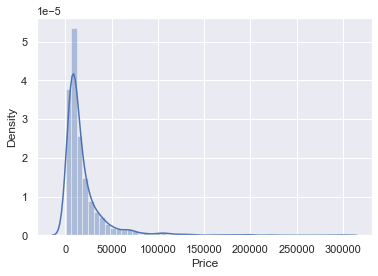

In [7]:
sns.distplot(data_sans_missingval['Price'])

The above is an exponential distribution. What we can do is remove top 1% of high values of Price to take care of the outliers.

In [8]:
one_p_mark = data_sans_missingval['Price'].quantile(0.99)
data_1 = data_sans_missingval[data_sans_missingval['Price']<one_p_mark]

Similarly, we can take care of Mileage outliers - 

In [9]:
one_p_mark = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<one_p_mark]

Another example of erratic values in data can be found in the engine volume feature. Engine volumes of all different cars barely exceeds the value 6.51 but in our data we have highest value at 99.99
Let's remove all values above 6.5 These are the cases where domain knowledge can be of high usage.

In [10]:
data_3 = data_2[data_2['EngineV']<6.5]

c:\users\amand\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

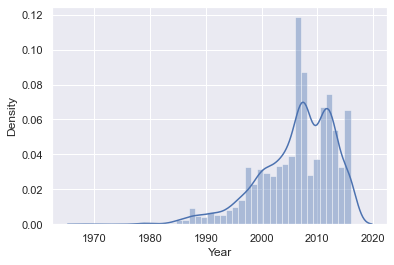

In [11]:
sns.distplot(data_sans_missingval['Year'])

Plotting the Year we can see that even though the mean lies around 2006, a lot of outliers lie around the 60's and 70's old cars. Let's take care of these outliers as well. We'll remove the oldest 1% of values from the Year column.

In [12]:
old_one_p = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>old_one_p]

Now that we have cleaned our data, let's reset the index and see the stats of our cleaned data.

In [13]:
data_cleaned = data_4.reset_index(drop=True)
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


From 4025 we've come down to 3867 data-items, after we've removed the erratic items in our data.

Since price is exponentially distributed, we can use its log-transform so that it's linearly related to the other features. This will also take care of the heteroscedasticity in our data.

In [14]:
log_price = np.log(data_cleaned['Price'])

In [15]:
data_cleaned['log_price'] = log_price
data_cleaned = data_cleaned.drop(['Price'],axis=1)

### Taking care of multicollinearity

Some of our features like year and mileage might induce some multicollinearity in our data. We can check this by using the principle of Variance Inflation Factor (V.I.F.)

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year']]

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

vif

,VIF,Features
0,3.791089,Mileage
1,3.791089,Year


Mileage and Year could have posed a high multicollinearity factor. But less than 4 seems to be a rather acceptable figure. We can always come back and reconsider retaining arguable VIF features, but by generally accepted standards (around 10 VIF is considered too high), we can move ahead, more so because mileage and year are both very important features when it comes to cars. In case our model is performing poorly, we'll change this.

In [17]:
data_no_multicollinearity = data_cleaned

### Taking care of Categorical Features - Label Encoding

To unpack user input in the final application, we can use dictionaries to identify encoded values for each number.
This can be done for all features, I'll show this for one feature, 'brands'.

In [18]:
brands = dict()

In [19]:
data = data_no_multicollinearity

In [20]:
data.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656


In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['Brand_encoding'] = le.fit_transform(data['Brand'])
for num, lbl in enumerate(le.classes_):
  brands[lbl] = num

data['Body_encoding'] = le.fit_transform(data['Body'])
data['Engine_Type_encoding'] = le.fit_transform(data['Engine Type'])
data['Reg_enc'] = le.fit_transform(data['Registration'])

In [22]:
brands # This encoding information will be useful while taking user input after deployment

{'Audi': 0,
 'BMW': 1,
 'Mercedes-Benz': 2,
 'Mitsubishi': 3,
 'Renault': 4,
 'Toyota': 5,
 'Volkswagen': 6}

Having taken care of categorical features by encoding them into numericals, we can now drop the original columns -

In [23]:
data_preprocessed = data.drop(['Brand', 'Body', 'Engine Type', 'Registration'], axis=1)
data_preprocessed.head()

,Mileage,EngineV,Year,log_price,Brand_encoding,Body_encoding,Engine_Type_encoding,Reg_enc
0,277,2.0,1991,8.342840,1,3,3,1
1,427,2.9,1999,8.974618,2,5,0,1
2,358,5.0,2003,9.495519,2,3,1,1
3,240,4.2,2007,10.043249,0,0,3,1
4,120,2.0,2011,9.814656,5,0,3,1


## Regression Model

In [24]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'],axis=1)

In [25]:
inputs.head()

,Mileage,EngineV,Year,Brand_encoding,Body_encoding,Engine_Type_encoding,Reg_enc
0,277,2.0,1991,1,3,3,1
1,427,2.9,1999,2,5,0,1
2,358,5.0,2003,2,3,1,1
3,240,4.2,2007,0,0,3,1
4,120,2.0,2011,5,0,3,1


### Scaling the data

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(inputs)

StandardScaler()

In [27]:
scaled_inputs = scaler.transform(inputs)

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, targets, test_size=0.2, random_state=365)

### Linear Regression

In [29]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [30]:
y_hat = reg.predict(x_train)

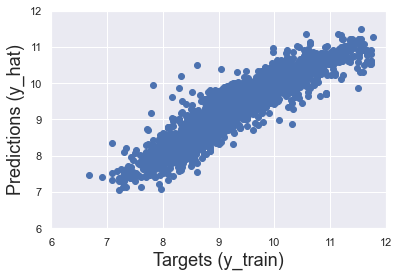

In [31]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,12)
plt.ylim(6,12)
plt.show()

Visualizing the predictions against the actual values, we can see we have reached a model around 45 degrees.

In [32]:
reg.score(x_train,y_train)

0.8372804852983075

Our R-Squared is around 83%. Let's take a look at the weights and bias -

In [33]:
reg.intercept_ # Bias

9.413335709650653

In [34]:
reg.coef_  # Weights of individual features

array([-0.10149155,  0.29744233,  0.51596917, -0.12168087, -0.11770343,
       -0.05661291,  0.2406064 ])

### Testing

In [35]:
y_hat_test = reg.predict(x_test)

In [36]:
from sklearn.metrics import r2_score

r2_score(y_test,y_hat_test)

0.8499809476335991

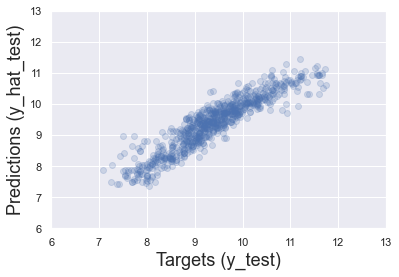

In [37]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Plotting a heatmap also gives us an indication of the saturation of data.

### Random Forest Regressor

Let's evaluate another great regression algorithm. We'll finally keep the one that performs better.

In [38]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [39]:
y_hat_test_2 = rf.predict(x_test)

In [40]:
r2_score(y_test,y_hat_test_2)

0.926938899714661

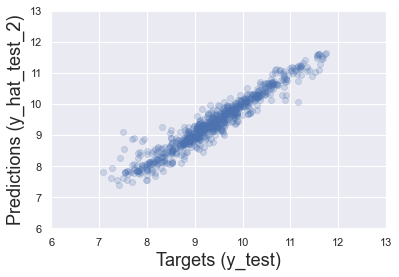

In [41]:
plt.scatter(y_test, y_hat_test_2, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test_2)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Based on the R-squared, Random forest regressor seems to perform better. Let's save the rf model.

### Saving the model

In [42]:
import pickle

price_model = {'scaler': scaler,
              'model': rf}

pickle.dump(price_model, open('price_model.pickle','wb'))